In [1]:
# import any necessary packages

import os
import pandas as pd
import numpy as np

In [2]:
# check current working directory
print(os.getcwd())

C:\Users\Luis


In [3]:
df = pd.read_csv(os.getcwd() + "/Projects/MLH_Fellowship_Warmup_Hackathon/data/sleepdata.csv")
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


In [4]:
# remove sleep notes, heart rate and activity, and for now, Wake up emoji
list(df)

['Start',
 'End',
 'Sleep quality',
 'Time in bed',
 'Wake up',
 'Sleep Notes',
 'Heart rate',
 'Activity (steps)']

In [5]:
df = df.drop('Heart rate', 1)
df = df.drop('Activity (steps)', 1)
df = df.drop('Sleep Notes', 1)
df = df.drop('Wake up', 1)

In [6]:
df

,Start,End,Sleep quality,Time in bed
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44
...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13


In [7]:
# chop sleep quality percentages to range between 0 and 10
def truncate_percentage_to_range(x):
    x = x.strip('%')
    x = int(x) / 10.0
    return x

df['Sleep quality'] = df['Sleep quality'].apply(truncate_percentage_to_range)
df

,Start,End,Sleep quality,Time in bed
0,2014-12-29 22:57:49,2014-12-30 07:30:13,10.0,8:32
1,2014-12-30 21:17:50,2014-12-30 21:33:54,0.3,0:16
2,2014-12-30 22:42:49,2014-12-31 07:13:31,9.8,8:30
3,2014-12-31 22:31:01,2015-01-01 06:03:01,6.5,7:32
4,2015-01-01 22:12:10,2015-01-02 04:56:35,7.2,6:44
...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,9.1,9:08
883,2018-02-13 23:49:19,2018-02-14 07:00:53,8.1,7:11
884,2018-02-14 21:24:05,2018-02-15 06:20:52,7.1,8:56
885,2018-02-15 21:36:32,2018-02-16 06:50:31,8.0,9:13


<AxesSubplot:xlabel='Start'>

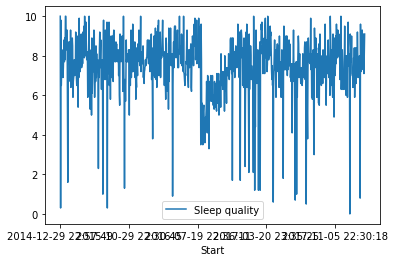

In [9]:
# Plot the data over the dates
# At first glance, we have 887 rows starting in 2014. 887 / 365 is approx 2.4 years,
# but technically this data set spans from the beginning of 2015 to the beginning of 2018,
# a time of over 3 years. There's definetly some gaps.
df.plot(x="Start", y = "Sleep quality")